<a href="https://colab.research.google.com/github/SzymonNowakowski/diffusions/blob/master/weight_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weight charts
### Author: Szymon Nowakowski



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Linear interpolating schedule

$$
  \alpha_t = 1-\frac{t}{T} \\
  \sigma_t = \frac{t}{T}
$$

**Legend:** $\tilde\eta$ is the weight minimzer, while $\hat\eta^\pm$ are the two etas for which the weights are exactly twice the optimum. Note that both $w^\epsilon$ and $w^{X_0}$ have the same eta minimizer and twice-the-weight point.

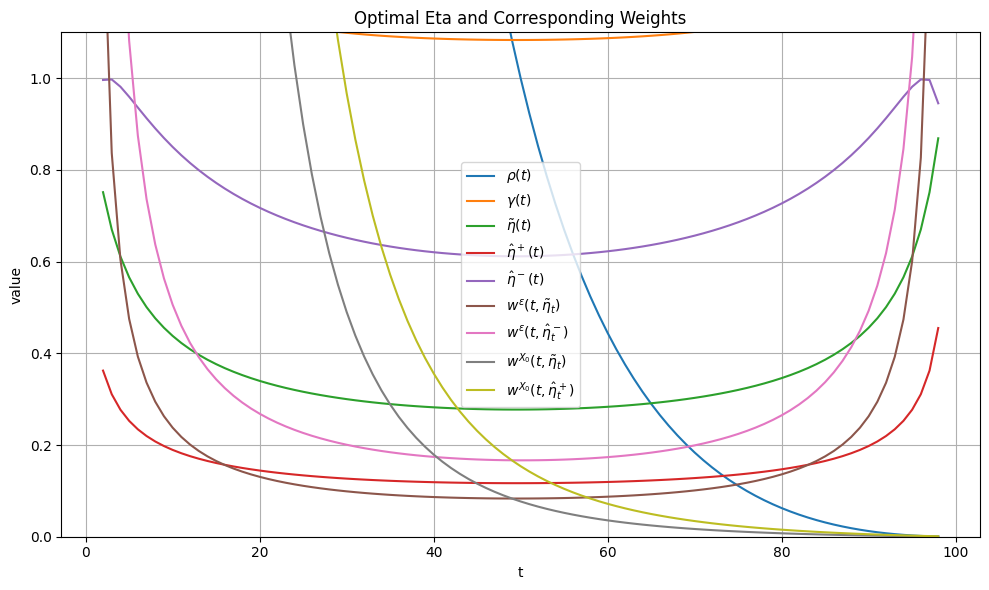

In [ ]:
T = 100
next_ind = lambda t: t+1
prev_ind = lambda t: t-1
alpha = lambda t: (T - t)/T
sigma = lambda t: t/T

rho = lambda t: (alpha(t)/sigma(t)) ** 2
gamma = lambda t: rho(t)/rho(next_ind(t))

eta_optim = lambda t: (1-1/gamma(t)) ** 0.5
weight_optim = lambda t: gamma(t) - 1
weight_epsilon = lambda t, eta: rho(t)/eta**2 * (1/rho(t)**0.5 * (1-eta**2)**0.5- 1/rho(next_ind(t))**0.5 )**2

weight_X0 = lambda t, eta: weight_epsilon(t, eta) * rho(next_ind(t))

eta_twice_plus = lambda t: np.sqrt(1 - (
    (np.sqrt(gamma(t)) + np.sqrt(gamma(t) - (2 * gamma(t) - 1) * (2 - gamma(t)))) / (2 * gamma(t) - 1)
)**2)
eta_twice_minus = lambda t: np.sqrt(1 - (
    (np.sqrt(gamma(t)) - np.sqrt(gamma(t) - (2 * gamma(t) - 1) * (2 - gamma(t)))) / (2 * gamma(t) - 1)
)**2)



# Evaluation range
ts = np.linspace(2, T-2, T-3)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ts, rho(ts), label=r'$\rho(t)$')
plt.plot(ts, gamma(ts), label=r'$\gamma(t)$')
plt.plot(ts, eta_optim(ts), label=r'$\tilde \eta (t)$')
plt.plot(ts, eta_twice_plus(ts), label=r'$\hat \eta^+ (t)$')
plt.plot(ts, eta_twice_minus(ts), label=r'$\hat \eta^- (t)$')
#plt.plot(ts, weight_optim(ts), label=r'$w_{\text{optim}}(t)$')
plt.plot(ts, weight_epsilon(ts, eta_optim(prev_ind(ts))), label=r'$w^\epsilon(t, \tilde \eta_{t})$')
plt.plot(ts, weight_epsilon(ts, eta_twice_minus(prev_ind(ts))), label=r'$w^\epsilon(t, \hat \eta^-_{t})$')
plt.plot(ts, weight_X0(ts, eta_optim(prev_ind(ts))), label=r'$w^{X_0}(t, \tilde \eta_{t})$')
plt.plot(ts, weight_X0(ts, eta_twice_plus(prev_ind(ts))), label=r'$w^{X_0}(t, \hat \eta^+_{t})$')
plt.xlabel('t')
plt.ylabel('value')
plt.title('Optimal Eta and Corresponding Weights')
plt.ylim(0, 1.1)  # restrict y-axis range
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Sine/Cosine Variance Preserving Interpolator

$$
\alpha(t) = \cos\left( \frac{\pi}{2} \frac{t}{T} \right)
$$

$$
\sigma(t) = \sin\left( \frac{\pi}{2} \frac{t}{T} \right)
$$

$$
\alpha^2(t) + \sigma^2(t) = 1
$$

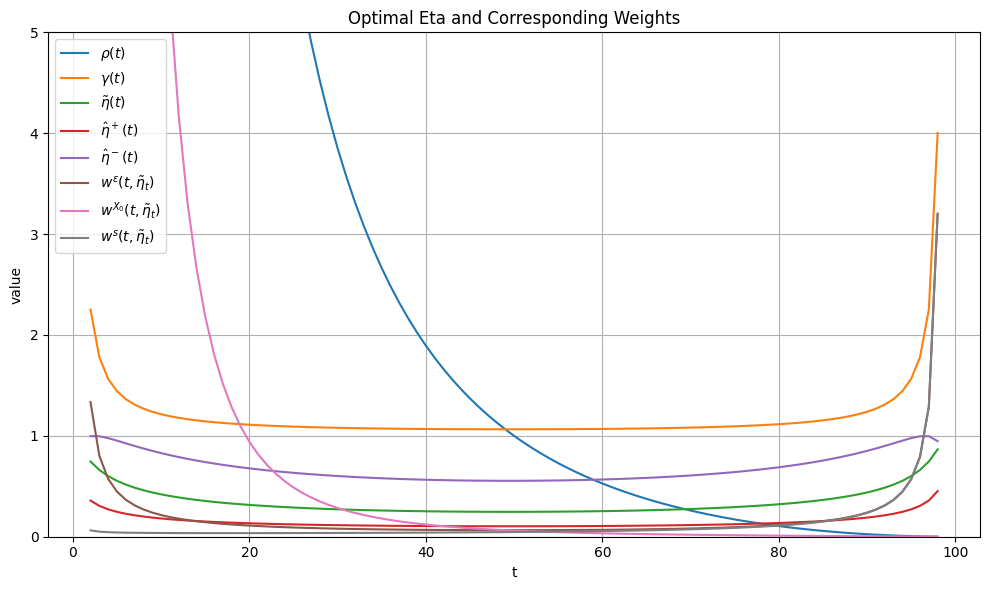

In [ ]:
T = 100
next_ind = lambda t: t+1
prev_ind = lambda t: t-1
alpha = lambda t: np.cos(t/T * np.pi / 2)
sigma = lambda t: np.sin(t/T * np.pi / 2)

rho = lambda t: (alpha(t)/sigma(t)) ** 2
gamma = lambda t: rho(t)/rho(next_ind(t))

eta_optim = lambda t: (1-1/gamma(t)) ** 0.5
weight_optim = lambda t: gamma(t) - 1
weight_epsilon = lambda t, eta: rho(t)/eta**2 * (1/rho(t)**0.5 * (1-eta**2)**0.5- 1/rho(next_ind(t))**0.5 )**2

weight_X0 = lambda t, eta: weight_epsilon(t, eta) * rho(next_ind(t))
weight_s = lambda t, eta: weight_epsilon(t, eta) * sigma(next_ind(t))

eta_twice_plus = lambda t: np.sqrt(1 - (
    (np.sqrt(gamma(t)) + np.sqrt(gamma(t) - (2 * gamma(t) - 1) * (2 - gamma(t)))) / (2 * gamma(t) - 1)
)**2)
eta_twice_minus = lambda t: np.sqrt(1 - (
    (np.sqrt(gamma(t)) - np.sqrt(gamma(t) - (2 * gamma(t) - 1) * (2 - gamma(t)))) / (2 * gamma(t) - 1)
)**2)



# Evaluation range
ts = np.linspace(2, T-2, T-3)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ts, rho(ts), label=r'$\rho(t)$')
plt.plot(ts, gamma(ts), label=r'$\gamma(t)$')
plt.plot(ts, eta_optim(ts), label=r'$\tilde \eta (t)$')
plt.plot(ts, eta_twice_plus(ts), label=r'$\hat \eta^+ (t)$')
plt.plot(ts, eta_twice_minus(ts), label=r'$\hat \eta^- (t)$')
#plt.plot(ts, weight_optim(ts), label=r'$w_{\text{optim}}(t)$')
plt.plot(ts, weight_epsilon(ts, eta_optim(prev_ind(ts))), label=r'$w^\epsilon(t, \tilde \eta_{t})$')
plt.plot(ts, weight_X0(ts, eta_optim(prev_ind(ts))), label=r'$w^{X_0}(t, \tilde \eta_{t})$')
plt.plot(ts, weight_s(ts, eta_optim(prev_ind(ts))), label=r'$w^{s}(t, \tilde \eta_{t})$')
plt.xlabel('t')
plt.ylabel('value')
plt.title('Optimal Eta and Corresponding Weights')
plt.ylim(0, 5)  # restrict y-axis range
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# VP preserving scheme for linearly growing $\tilde \sigma$ and $\tilde \alpha=1.0$ for $T=75$ steps

We can't hold that. We need to rescale $\sigma$ and $\alpha$. We do that as follows: for $i = 0, \dots, 75$:

$$
\alpha_i = \frac{1}{i+1}, \qquad \sigma_i = \frac{i}{i+1}.
$$

Then set the endpoint:

$$
\alpha_{76} = 0, \qquad \sigma_{76} = 1.
$$

It makes
$$
\frac{\alpha_i}{\sigma_i} = \frac{1}{i}, \qquad \rho_i=\frac{1}{i^2}, \qquad \rho_i=\frac{1}{\tilde \sigma^2}, \qquad \gamma_i = \left(\frac{i+1}{i}\right)^2
$$

Consequently, for linearly growing $\sigma$ and constant $\alpha=1.0$ for a corresponding number of steps one should assume that the denoiser weights at time $t$ is equal to $w^{X_0}_t=\rho_t - \rho_{t+1} = \frac{1}{t^2}-\frac{1}{(t+1)^2}$.


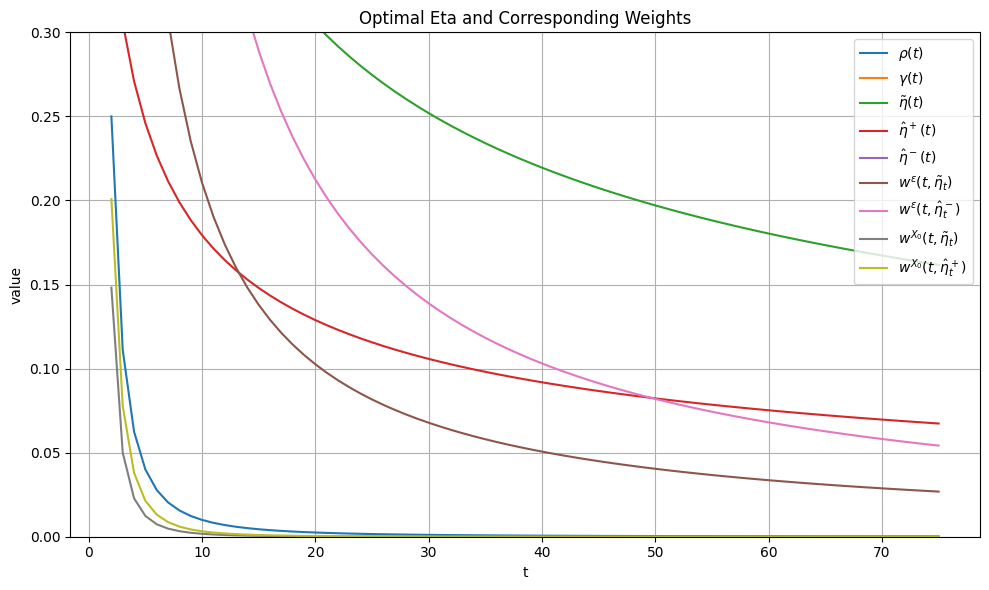

In [ ]:
T = 77
next_ind = lambda t: t+1
prev_ind = lambda t: t-1
alpha = lambda t: 1/(t+1)
sigma = lambda t: t/(t+1)

rho = lambda t: (alpha(t)/sigma(t)) ** 2
gamma = lambda t: rho(t)/rho(next_ind(t))

eta_optim = lambda t: (1-1/gamma(t)) ** 0.5
weight_optim = lambda t: gamma(t) - 1
weight_epsilon = lambda t, eta: rho(t)/eta**2 * (1/rho(t)**0.5 * (1-eta**2)**0.5- 1/rho(next_ind(t))**0.5 )**2

weight_X0 = lambda t, eta: weight_epsilon(t, eta) * rho(next_ind(t))

eta_twice_plus = lambda t: np.sqrt(1 - (
    (np.sqrt(gamma(t)) + np.sqrt(gamma(t) - (2 * gamma(t) - 1) * (2 - gamma(t)))) / (2 * gamma(t) - 1)
)**2)
eta_twice_minus = lambda t: np.sqrt(1 - (
    (np.sqrt(gamma(t)) - np.sqrt(gamma(t) - (2 * gamma(t) - 1) * (2 - gamma(t)))) / (2 * gamma(t) - 1)
)**2)



# Evaluation range
ts = np.linspace(2, T-2, T-3)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ts, rho(ts), label=r'$\rho(t)$')
plt.plot(ts, gamma(ts), label=r'$\gamma(t)$')
plt.plot(ts, eta_optim(ts), label=r'$\tilde \eta (t)$')
plt.plot(ts, eta_twice_plus(ts), label=r'$\hat \eta^+ (t)$')
plt.plot(ts, eta_twice_minus(ts), label=r'$\hat \eta^- (t)$')
#plt.plot(ts, weight_optim(ts), label=r'$w_{\text{optim}}(t)$')
plt.plot(ts, weight_epsilon(ts, eta_optim(prev_ind(ts))), label=r'$w^\epsilon(t, \tilde \eta_{t})$')
plt.plot(ts, weight_epsilon(ts, eta_twice_minus(prev_ind(ts))), label=r'$w^\epsilon(t, \hat \eta^-_{t})$')
plt.plot(ts, weight_X0(ts, eta_optim(prev_ind(ts))), label=r'$w^{X_0}(t, \tilde \eta_{t})$')
plt.plot(ts, weight_X0(ts, eta_twice_plus(prev_ind(ts))), label=r'$w^{X_0}(t, \hat \eta^+_{t})$')
plt.xlabel('t')
plt.ylabel('value')
plt.title('Optimal Eta and Corresponding Weights')
plt.ylim(0, 0.3)  # restrict y-axis range
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()